**Trabalho:** Projeto Integrador 2

**Discentes**: Bruna Mattioli de Oliveira e Gabriel Andrade Varga

**Descrição:** Análises da base contendo informações de Desmatamento na Amazônia Legal

Fonte: http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes

<h1>Pacotes necessários

In [1]:
import numpy as np
import pandas as pd
import psycopg2 
import csv
import pandas.io.sql as sqlio
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
import locale
locale.setlocale(locale.LC_NUMERIC, "pt_BR.UTF-8")

'pt_BR.UTF-8'

<h1>Leitura do Banco de Dados diretamente do PostgreSQL

In [2]:
# Conexão no postgre com o banco de dados Projeto_Integrador_2
conn = psycopg2.connect("dbname=Projeto_Integrador_2 user=postgres password=vagan9ch")
cur = conn.cursor()

# Criação de um Data Frame (DF) com alguns dos dados do BD utilizando Pandas
sql_bd = "SELECT id_desmatamento, nome_municipio, ano, sigla_uf, km_hidrografia, km_area_total, km_desmatado, km_n_floresta, km_nuvem, km_n_obs, km_floresta, CASE WHEN sigla_uf = 'PA' THEN 'Pará' WHEN sigla_uf = 'MT' THEN 'Mato Grosso' WHEN sigla_uf = 'MA' THEN 'Maranhão' WHEN sigla_uf = 'RO' THEN 'Rondônia' WHEN sigla_uf = 'TO' THEN 'Tocantins' WHEN sigla_uf = 'AC' THEN 'Acre' WHEN sigla_uf = 'AM' THEN 'Amazonas' WHEN sigla_uf = 'RR' THEN 'Roraima' WHEN sigla_uf = 'AP' THEN 'Amapá' ELSE '' END AS nome_uf FROM desmatamento AS d, uf AS u, municipio AS m, ano AS a WHERE d.id_municipio = m.id_municipio AND d.id_ano = a.id_ano AND m.id_uf = u.id_uf;"
bd_desmatamento = sqlio.read_sql_query(sql_bd, conn)
bd_desmatamento.head(5)

,id_desmatamento,nome_municipio,ano,sigla_uf,km_hidrografia,km_area_total,km_desmatado,km_n_floresta,km_nuvem,km_n_obs,km_floresta,nome_uf
0,1,Paragominas,2000,PA,36.0,19465.0,7212.3,7.1,0.0,1.4,12208.2,Pará
1,2,São Félix do Xingu,2000,PA,939.0,84253.0,7037.4,3788.0,0.0,6.5,72482.1,Pará
2,3,Marabá,2000,PA,86.0,15161.0,5818.9,36.2,0.0,1.7,9218.2,Pará
3,4,Juara,2000,MT,127.0,22666.0,5520.7,1600.6,0.0,29.3,15388.4,Mato Grosso
4,5,Santa Luzia,2000,MA,0.0,6245.0,5373.3,0.0,0.0,0.4,871.3,Maranhão


<h1>Describe da Base

In [3]:
bd_desmatamento.describe().round()

,id_desmatamento,ano,km_hidrografia,km_area_total,km_desmatado,km_n_floresta,km_nuvem,km_n_obs,km_floresta
count,15960.0,15960.0,15960.0,15960.0,15960.0,15960.0,15960.0,15960.0,15960.0
mean,7980.0,2010.0,149.0,6668.0,949.0,1265.0,318.0,100.0,3971.0
std,4607.0,6.0,430.0,13858.0,1360.0,2402.0,1983.0,576.0,11930.0
min,1.0,2000.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0
25%,3991.0,2005.0,0.0,892.0,120.0,5.0,0.0,0.0,18.0
50%,7980.0,2010.0,4.0,2380.0,450.0,196.0,0.0,0.0,222.0
75%,11970.0,2015.0,65.0,6422.0,1250.0,1437.0,5.0,1.0,2296.0
max,15960.0,2020.0,4500.0,159540.0,19886.0,19781.0,68395.0,11321.0,152014.0


<h1>Gráfico 1 - Barras Agrupadas

In [4]:
# Filtro na base de origem
bd_desmatamento_ano = bd_desmatamento[(bd_desmatamento['ano'] >= 2012)] 

# Sumarização da base com os campos necessários
desmatamento_ano_sum = bd_desmatamento_ano.groupby('ano')[['km_desmatado', 'km_n_floresta', 'km_nuvem', 'km_floresta']].sum().reset_index()

# Criação de uma base com a soma do valor total das colunas
desmatamento_ano_sum_total = desmatamento_ano_sum['km_desmatado'] + desmatamento_ano_sum['km_n_floresta'] + desmatamento_ano_sum['km_nuvem'] + desmatamento_ano_sum['km_floresta']

# Divisão de cada coluna pelo valor total da soma para verificar qual a porcentagem cada coluna representa do total
desmatamento_ano_sum_rel = desmatamento_ano_sum[desmatamento_ano_sum.columns[1:]].div(desmatamento_ano_sum_total, 0) * 100

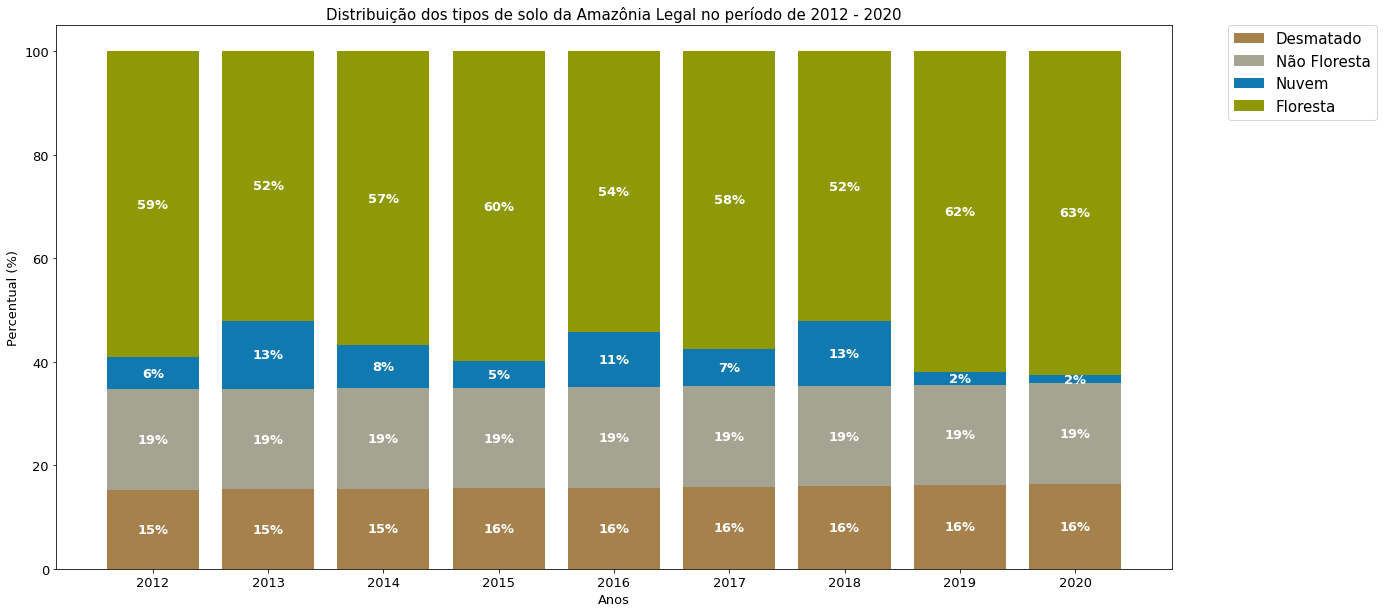

In [5]:
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = [20, 10]

# Utilizar a formatação numérica brasileira
plt.rcParams['axes.formatter.use_locale'] = True

lista_campos = ['km_hidrografia', 'km_desmatado', 'km_n_floresta', 'km_nuvem', 'km_n_obs', 'km_floresta']

# Início do gráfico
fig1, ax_desmatamento_ano = plt.subplots(1, 1)

# Plotagem das informações do gráfico de barras agrupado
plt.bar(desmatamento_ano_sum['ano'], desmatamento_ano_sum_rel['km_desmatado'], label = 'Desmatado', color = 'xkcd:coffee')
plt.bar(desmatamento_ano_sum['ano'], desmatamento_ano_sum_rel['km_n_floresta'], bottom = desmatamento_ano_sum_rel['km_desmatado'], label = 'Não Floresta', color = 'xkcd:cement')
plt.bar(desmatamento_ano_sum['ano'], desmatamento_ano_sum_rel['km_nuvem'], bottom = desmatamento_ano_sum_rel['km_desmatado'] + desmatamento_ano_sum_rel['km_n_floresta'], label = 'Nuvem', color = 'xkcd:nice blue')
plt.bar(desmatamento_ano_sum['ano'], desmatamento_ano_sum_rel['km_floresta'], bottom = desmatamento_ano_sum_rel['km_desmatado'] + desmatamento_ano_sum_rel['km_n_floresta'] + desmatamento_ano_sum_rel['km_nuvem'], label = 'Floresta', color = 'xkcd:baby poop green')

# Informações adicionais: título, labels, legenda, nome dos eixos, grid, formatação
# setar o nome dos itens do eixo x
ax_desmatamento_ano.set_xticks([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
# nome eixo y
ax_desmatamento_ano.set_ylabel('Percentual (%)', fontsize=13)
# nome eixo x
ax_desmatamento_ano.set_xlabel('Anos', fontsize=13)
# título
ax_desmatamento_ano.set_title('Distribuição dos tipos de solo da Amazônia Legal no período de 2012 - 2020', fontsize=15)
# plotar legenda fora do gráfico    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15) 

# Ajuste tamanho do eixo x
plt.xticks(fontsize=13)
# Ajuste tamanho do eixo y
plt.yticks(fontsize=13)

# formatação numérica do eixo y
ax_desmatamento_ano.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: '{:.16n}'.format(x)))

# Adição de texto com as porcentagens
for rec in ax_desmatamento_ano.patches:
    height = rec.get_height()
    ax_desmatamento_ano.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='center',
              color="white", 
              fontsize=13, 
              fontweight="bold")
    
# Salvar a imagem
fig1.savefig('Imagens/grafico1.png', dpi=200, bbox_inches='tight')

<h1>Gráfico 2 - Gráfico de Pontos

In [6]:
#-----------------------------------------------------------
# Tratamento da base
#-----------------------------------------------------------

# Filtro na base de origem
bd_desmatamento_ano = bd_desmatamento[(bd_desmatamento['ano'] >= 2012)] 

# Selecionando os estados a serem estudados
desmatamento_uf_ac = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'AC']
desmatamento_uf_ap = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'AP']
desmatamento_uf_am = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'AM']
desmatamento_uf_ma = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'MA']
desmatamento_uf_mt = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'MT']
desmatamento_uf_pa = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'PA']
desmatamento_uf_ro = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'RO']
desmatamento_uf_rr = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'RR']
desmatamento_uf_to = bd_desmatamento_ano[bd_desmatamento_ano['sigla_uf'] == 'TO']

# Sumarização de cada base
desmatamento_uf_ac_sum = desmatamento_uf_ac.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_ap_sum = desmatamento_uf_ap.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_am_sum = desmatamento_uf_am.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_ma_sum = desmatamento_uf_ma.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_mt_sum = desmatamento_uf_mt.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_pa_sum = desmatamento_uf_pa.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_ro_sum = desmatamento_uf_ro.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_rr_sum = desmatamento_uf_rr.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_to_sum = desmatamento_uf_to.groupby('ano')['km_desmatado'].sum().reset_index()

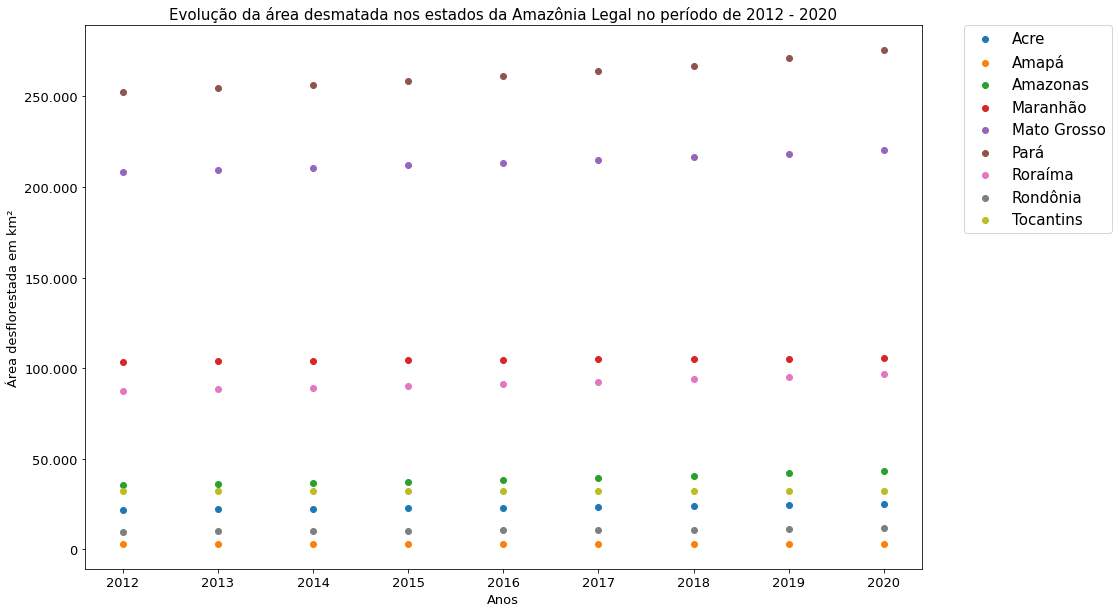

In [7]:
#-----------------------------------------------------------
# Criação do gráfico
#-----------------------------------------------------------

# Tamanho da figura
plt.rcParams['figure.figsize'] = [15, 10]

# Utilizar a formatação numérica brasileira
plt.rcParams['axes.formatter.use_locale'] = True

# Início do gráfico
fig2, ax_desmatamento_uf = plt.subplots(1, 1)

# Plotagem das informações
ax_desmatamento_uf.scatter(x = desmatamento_uf_ac_sum['ano'], y = desmatamento_uf_ac_sum['km_desmatado'], label = 'Acre')
ax_desmatamento_uf.scatter(x = desmatamento_uf_ap_sum['ano'], y = desmatamento_uf_ap_sum['km_desmatado'], label = 'Amapá')
ax_desmatamento_uf.scatter(x = desmatamento_uf_am_sum['ano'], y = desmatamento_uf_am_sum['km_desmatado'], label = 'Amazonas')
ax_desmatamento_uf.scatter(x = desmatamento_uf_ma_sum['ano'], y = desmatamento_uf_ma_sum['km_desmatado'], label = 'Maranhão')
ax_desmatamento_uf.scatter(x = desmatamento_uf_mt_sum['ano'], y = desmatamento_uf_mt_sum['km_desmatado'], label = 'Mato Grosso')
ax_desmatamento_uf.scatter(x = desmatamento_uf_pa_sum['ano'], y = desmatamento_uf_pa_sum['km_desmatado'], label = 'Pará')
ax_desmatamento_uf.scatter(x = desmatamento_uf_ro_sum['ano'], y = desmatamento_uf_ro_sum['km_desmatado'], label = 'Roraíma')
ax_desmatamento_uf.scatter(x = desmatamento_uf_rr_sum['ano'], y = desmatamento_uf_rr_sum['km_desmatado'], label = 'Rondônia')
ax_desmatamento_uf.scatter(x = desmatamento_uf_to_sum['ano'], y = desmatamento_uf_to_sum['km_desmatado'], label = 'Tocantins')

# Informações adicionais: título, labels, legenda, nome dos eixos, grid, formatação
# título
ax_desmatamento_uf.set_title('Evolução da área desmatada nos estados da Amazônia Legal no período de 2012 - 2020', fontsize=15) 
# nome eixo y
ax_desmatamento_uf.set_ylabel('Área desflorestada em km²', fontsize=13)
# nome eixo x
ax_desmatamento_uf.set_xlabel('Anos', fontsize=13) 
# plotar legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15) 
# setar o nome dos itens do eixo x
ax_desmatamento_uf.set_xticks([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]) 
# Ajuste tamanho do eixo x
plt.xticks(fontsize=13)
# Ajuste tamanho do eixo y
plt.yticks(fontsize=13)
# formatação numérica do eixo y
ax_desmatamento_uf.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: '{:.16n}'.format(x))) 

# Salvar a imagem
fig2.savefig('Imagens/grafico2.png', dpi=200, bbox_inches='tight')

<h1>Gráfico 3 - Gráfico de Linha

In [8]:
#-----------------------------------------------------------
# Tratamento da base
#-----------------------------------------------------------

# Filtro na base de origem
bd_desmatamento_uf_ano = bd_desmatamento[(bd_desmatamento['ano'] >= 2012)] 

# Selecionando os estados a serem estudados
desmatamento_uf_ac = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'AC']
desmatamento_uf_ap = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'AP']
desmatamento_uf_am = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'AM']
desmatamento_uf_ma = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'MA']
desmatamento_uf_mt = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'MT']
desmatamento_uf_pa = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'PA']
desmatamento_uf_ro = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'RO']
desmatamento_uf_rr = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'RR']
desmatamento_uf_to = bd_desmatamento_uf_ano[bd_desmatamento_uf_ano['sigla_uf'] == 'TO']

# Sumarização de cada base
desmatamento_uf_ac_sum = desmatamento_uf_ac.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_ap_sum = desmatamento_uf_ap.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_am_sum = desmatamento_uf_am.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_ma_sum = desmatamento_uf_ma.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_mt_sum = desmatamento_uf_mt.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_pa_sum = desmatamento_uf_pa.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_ro_sum = desmatamento_uf_ro.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_rr_sum = desmatamento_uf_rr.groupby('ano')['km_desmatado'].sum().reset_index()
desmatamento_uf_to_sum = desmatamento_uf_to.groupby('ano')['km_desmatado'].sum().reset_index()

# Criação de uma lista para o campo km_desmatado
desmatamento_uf_ac_lista = list(desmatamento_uf_ac_sum['km_desmatado'])
desmatamento_uf_ap_lista = list(desmatamento_uf_ap_sum['km_desmatado'])
desmatamento_uf_am_lista = list(desmatamento_uf_am_sum['km_desmatado'])
desmatamento_uf_ma_lista = list(desmatamento_uf_ma_sum['km_desmatado'])
desmatamento_uf_mt_lista = list(desmatamento_uf_mt_sum['km_desmatado'])
desmatamento_uf_pa_lista = list(desmatamento_uf_pa_sum['km_desmatado'])
desmatamento_uf_ro_lista = list(desmatamento_uf_ro_sum['km_desmatado'])
desmatamento_uf_rr_lista = list(desmatamento_uf_rr_sum['km_desmatado'])
desmatamento_uf_to_lista = list(desmatamento_uf_to_sum['km_desmatado'])

# Cálculo do incremento de desmatamento ano por ano
i = 1
variacao_desmatamento_uf_ac = []
variacao_desmatamento_uf_ap = []
variacao_desmatamento_uf_am = []
variacao_desmatamento_uf_ma = []
variacao_desmatamento_uf_mt = []
variacao_desmatamento_uf_pa = []
variacao_desmatamento_uf_ro = []
variacao_desmatamento_uf_rr = []
variacao_desmatamento_uf_to = []

while i < 9:
    variacao_desmatamento_uf_ac.append(desmatamento_uf_ac_lista[i] - desmatamento_uf_ac_lista[i-1])
    variacao_desmatamento_uf_ap.append(desmatamento_uf_ap_lista[i] - desmatamento_uf_ap_lista[i-1])
    variacao_desmatamento_uf_am.append(desmatamento_uf_am_lista[i] - desmatamento_uf_am_lista[i-1])
    variacao_desmatamento_uf_ma.append(desmatamento_uf_ma_lista[i] - desmatamento_uf_ma_lista[i-1])
    variacao_desmatamento_uf_mt.append(desmatamento_uf_mt_lista[i] - desmatamento_uf_mt_lista[i-1])
    variacao_desmatamento_uf_pa.append(desmatamento_uf_pa_lista[i] - desmatamento_uf_pa_lista[i-1])
    variacao_desmatamento_uf_ro.append(desmatamento_uf_ro_lista[i] - desmatamento_uf_ro_lista[i-1])
    variacao_desmatamento_uf_rr.append(desmatamento_uf_rr_lista[i] - desmatamento_uf_rr_lista[i-1])
    variacao_desmatamento_uf_to.append(desmatamento_uf_to_lista[i] - desmatamento_uf_to_lista[i-1])
    i +=1

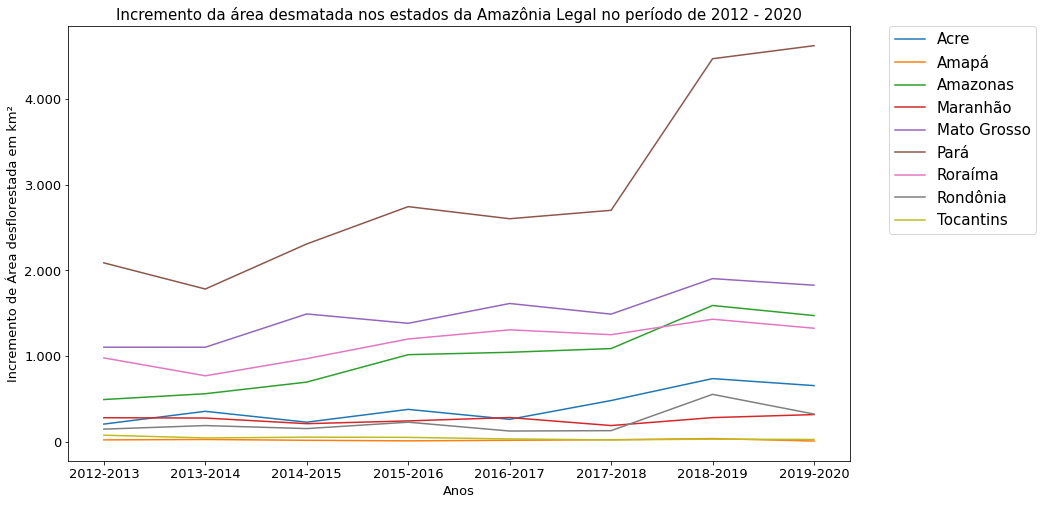

In [9]:
#-----------------------------------------------------------
# Criação do gráfico
#-----------------------------------------------------------

# Itens do eixo x e da legenda
ano = ('2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020')
estado = ('Acre', 'Amapá', 'Amazonas', 'Maranhão', 'Mato Grosso', 'Pará', 'Roraíma', 'Rondônia', 'Tocantins')

# Gráficos
plt.rcParams['figure.figsize'] = [14, 8]

# Utilizar a formatação numérica brasileira
plt.rcParams['axes.formatter.use_locale'] = True

# Início do gráfico
fig3, desmatamento_total = plt.subplots(1)

# Plotagem das informações
desmatamento_total.plot(ano, variacao_desmatamento_uf_ac, label = estado[0])
desmatamento_total.plot(ano, variacao_desmatamento_uf_ap, label = estado[1])
desmatamento_total.plot(ano, variacao_desmatamento_uf_am, label = estado[2])
desmatamento_total.plot(ano, variacao_desmatamento_uf_ma, label = estado[3])
desmatamento_total.plot(ano, variacao_desmatamento_uf_mt, label = estado[4])
desmatamento_total.plot(ano, variacao_desmatamento_uf_pa, label = estado[5])
desmatamento_total.plot(ano, variacao_desmatamento_uf_ro, label = estado[6])
desmatamento_total.plot(ano, variacao_desmatamento_uf_rr, label = estado[7])
desmatamento_total.plot(ano, variacao_desmatamento_uf_to, label = estado[8])

# Informações adicionais: título, labels, legenda, nome dos eixos, grid, formatação
# título
desmatamento_total.set_title('Incremento da área desmatada nos estados da Amazônia Legal no período de 2012 - 2020', fontsize=15) 
# nome eixo y
desmatamento_total.set_ylabel('Incremento de Área desflorestada em km²', fontsize=13)
# nome eixo x
desmatamento_total.set_xlabel('Anos', fontsize=13) 
# plotar legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15) 
# Ajuste tamanho do eixo x
plt.xticks(fontsize=13)
# Ajuste tamanho do eixo y
plt.yticks(fontsize=13)
# formatação numérica do eixo y
desmatamento_total.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: '{:.16n}'.format(x))) 

# Salvar a imagem
fig3.savefig('Imagens/grafico3.png', dpi=200, bbox_inches='tight')

<h1>Gráfico 4 - Gráfico de Múltiplas Barras

In [10]:
#-----------------------------------------------------------
# Tratamento da base
#-----------------------------------------------------------

#-----------
# Amazonas
#-----------

# Filtro na base de origem para o estado do Amazonas
am_desmatamento = bd_desmatamento[(bd_desmatamento['sigla_uf'] == 'AM') &  (bd_desmatamento['ano'] >= 2012)] 

# Sumarização da base
am_desmatamento_sum = am_desmatamento.groupby('ano')[['km_desmatado']].sum().reset_index()

# Criação de uma lista com a informação de km_desmatado
am_desmatamento_lista = list(am_desmatamento_sum["km_desmatado"])  

# Cálculo do incremento de desmatamento ano por ano
i = 1
am_variacao_desmatamento = []
while i < 9:
    am_variacao_desmatamento.append(am_desmatamento_lista[i] - am_desmatamento_lista[i-1])
    i +=1

#-----------
# Pará
#-----------

# Filtro na base de origem para o estado do Pará
pa_desmatamento = bd_desmatamento[(bd_desmatamento['sigla_uf'] == 'PA') &  (bd_desmatamento['ano'] >= 2012)] 

# Sumarização da base
pa_desmatamento_sum = pa_desmatamento.groupby('ano')[['km_desmatado']].sum().reset_index()

# Criação de uma lista com a informação de km_desmatado
pa_desmatamento_lista = list(pa_desmatamento_sum["km_desmatado"]) 

# Cálculo do incremento de desmatamento ano por ano
i = 1
pa_variacao_desmatamento = []
while i < 9:
    pa_variacao_desmatamento.append(pa_desmatamento_lista[i] - pa_desmatamento_lista[i-1])
    i +=1
    
#-----------
# Mato Grosso
#-----------

# Filtro na base de origem para o estado do Mato Grosso
mt_desmatamento = bd_desmatamento[(bd_desmatamento['sigla_uf'] == 'MT') &  (bd_desmatamento['ano'] >= 2012)] 

# Sumarização da base
mt_desmatamento_sum = mt_desmatamento.groupby('ano')[['km_desmatado']].sum().reset_index()

# Criação de uma lista com a informação de km_desmatado
mt_desmatamento_lista = list(mt_desmatamento_sum["km_desmatado"]) 

# Cálculo do incremento de desmatamento ano por ano
i = 1
mt_variacao_desmatamento = []
while i < 9:
    mt_variacao_desmatamento.append(mt_desmatamento_lista[i] - mt_desmatamento_lista[i-1])
    i +=1

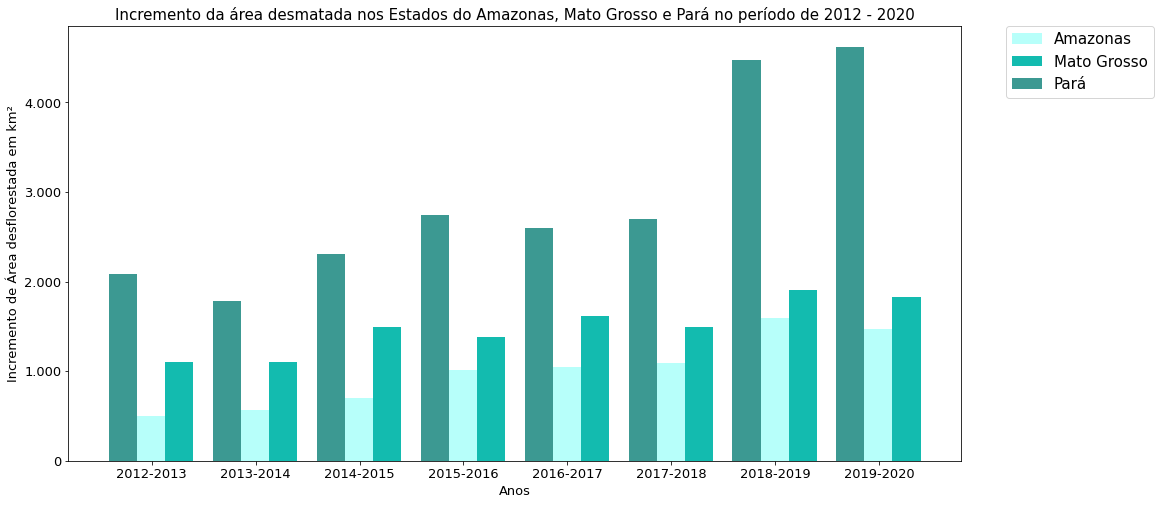

In [11]:
#-----------------------------------------------------------
# Criação do gráfico
#-----------------------------------------------------------

# Eixo x
ano = ('2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020')

# Gráficos
plt.rcParams['figure.figsize'] = [16, 8]

# Utilizar a formatação numérica brasileira
plt.rcParams['axes.formatter.use_locale'] = True

# Quantidade de agrupamento de barras no eixo x
N = 8
# Posicionamento da barra
width = 0.27
ind = np.arange(N)

# Início do gráfico
fig4, ax_comparativo = plt.subplots(1)

# Plotagem das informações
ax_comparativo.bar(ind, am_variacao_desmatamento, width, label = 'Amazonas', color = 'xkcd:pale cyan')
ax_comparativo.bar(ind + width, mt_variacao_desmatamento, width, label = 'Mato Grosso', color = 'xkcd:topaz')
ax_comparativo.bar(ind - width, pa_variacao_desmatamento, width, label = 'Pará', color = 'xkcd:sea')

# Informações adicionais: título, labels, legenda, nome dos eixos, grid, formatação

# setar o nome e a posição dos itens do eixo x
plt.xticks(ind + width / 40, ('2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020'))
# título
ax_comparativo.set_title('Incremento da área desmatada nos Estados do Amazonas, Mato Grosso e Pará no período de 2012 - 2020', fontsize=15) 
# nome eixo y
ax_comparativo.set_ylabel('Incremento de Área desflorestada em km²', fontsize=13)
# nome eixo x
ax_comparativo.set_xlabel('Anos', fontsize=13) 
# plotar legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15) 
# Ajuste tamanho do eixo x
plt.xticks(fontsize=13)
# Ajuste tamanho do eixo y
plt.yticks(fontsize=13)
# formatação numérica do eixo y
ax_comparativo.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: '{:.16n}'.format(x))) 

# Salvar a imagem
fig4.savefig('Imagens/grafico4.png', dpi=200, bbox_inches='tight')

<h1>Gráfico 5 e 6 - Múltiplos Gráficos de Linha utilizando o mesmo Eixo x

In [12]:
#-----------------------------------------------------------
# Tratamento da base
#-----------------------------------------------------------

#-----------
# Pará
#-----------

# Filtro na base de origem para o estado do Pará no ano de 2020
pa_desmatamento = bd_desmatamento[(bd_desmatamento['ano'] == 2020) & (bd_desmatamento['sigla_uf'] == 'PA')] 

# Ordenação para descobrir os 5 municípios que mais tem área desmatada no ano de 2020
pa_desmatamento.sort_values(by=['km_desmatado'], ascending=False).head(5)

# Filtro da base de origem com os 5 municípios que mais tem área desmatada no ano de 2020
cidades_pa = ['São Félix do Xingu', 'Altamira', 'Marabá', 'Paragominas', 'Novo Repartimento']
filtros = bd_desmatamento.nome_municipio.isin(cidades_pa) & (bd_desmatamento['ano'] >= 2012) & (bd_desmatamento['sigla_uf'] == 'PA')
bd_desmatamento_pa = bd_desmatamento[filtros]

# Criação de uma base para cada município
bd_desmatamento_pa_0 = bd_desmatamento_pa[(bd_desmatamento_pa['nome_municipio'] == cidades_pa[0])]
bd_desmatamento_pa_1 = bd_desmatamento_pa[(bd_desmatamento_pa['nome_municipio'] == cidades_pa[1])]
bd_desmatamento_pa_2 = bd_desmatamento_pa[(bd_desmatamento_pa['nome_municipio'] == cidades_pa[2])]
bd_desmatamento_pa_3 = bd_desmatamento_pa[(bd_desmatamento_pa['nome_municipio'] == cidades_pa[3])]
bd_desmatamento_pa_4 = bd_desmatamento_pa[(bd_desmatamento_pa['nome_municipio'] == cidades_pa[4])]

# Criação de uma lista com a informação de km_desmatado para cada município
lista_desmatamento_pa_0 = list(bd_desmatamento_pa_0["km_desmatado"])
lista_desmatamento_pa_1 = list(bd_desmatamento_pa_1["km_desmatado"])
lista_desmatamento_pa_2 = list(bd_desmatamento_pa_2["km_desmatado"])
lista_desmatamento_pa_3 = list(bd_desmatamento_pa_3["km_desmatado"])
lista_desmatamento_pa_4 = list(bd_desmatamento_pa_4["km_desmatado"])  

# Cálculo do incremento de desmatamento ano por ano para cada município
i = 1
variacao_desmatamento_pa_0 = []
variacao_desmatamento_pa_1 = []
variacao_desmatamento_pa_2 = []
variacao_desmatamento_pa_3 = []
variacao_desmatamento_pa_4 = []
while i < 9:
    variacao_desmatamento_pa_0.append(lista_desmatamento_pa_0[i] - lista_desmatamento_pa_0[i-1])
    variacao_desmatamento_pa_1.append(lista_desmatamento_pa_1[i] - lista_desmatamento_pa_1[i-1])
    variacao_desmatamento_pa_2.append(lista_desmatamento_pa_2[i] - lista_desmatamento_pa_2[i-1])
    variacao_desmatamento_pa_3.append(lista_desmatamento_pa_3[i] - lista_desmatamento_pa_3[i-1])
    variacao_desmatamento_pa_4.append(lista_desmatamento_pa_4[i] - lista_desmatamento_pa_4[i-1])
    i +=1
    
#-------------
# Mato Grosso
#-------------

# Filtro na base de origem para o estado do Pará no ano de 2020
mt_desmatamento = bd_desmatamento[(bd_desmatamento['ano'] == 2020) & (bd_desmatamento['sigla_uf'] == 'MT')] 

# Ordenação para descobrir os 5 municípios que mais tem área desmatada no ano de 2020
mt_desmatamento.sort_values(by=['km_desmatado'], ascending=False).head(5)

# Filtro da base de origem com os 5 municípios que mais tem área desmatada no ano de 2020
cidades_mt = ['Juara', 'Colniza', 'Querência', 'Alta Floresta', 'Vila Bela da Santíssima Trindade']
filtros = bd_desmatamento.nome_municipio.isin(cidades_mt) & (bd_desmatamento['ano'] >= 2012) & (bd_desmatamento['sigla_uf'] == 'MT')
bd_desmatamento_mt = bd_desmatamento[filtros]

# Criação de uma base para cada município
bd_desmatamento_mt_0 = bd_desmatamento_mt[(bd_desmatamento_mt['nome_municipio'] == cidades_mt[0])]
bd_desmatamento_mt_1 = bd_desmatamento_mt[(bd_desmatamento_mt['nome_municipio'] == cidades_mt[1])]
bd_desmatamento_mt_2 = bd_desmatamento_mt[(bd_desmatamento_mt['nome_municipio'] == cidades_mt[2])]
bd_desmatamento_mt_3 = bd_desmatamento_mt[(bd_desmatamento_mt['nome_municipio'] == cidades_mt[3])]
bd_desmatamento_mt_4 = bd_desmatamento_mt[(bd_desmatamento_mt['nome_municipio'] == cidades_mt[4])]

# Criação de uma lista com a informação de km_desmatado para cada município
lista_desmatamento_mt_0 = list(bd_desmatamento_mt_0["km_desmatado"])
lista_desmatamento_mt_1 = list(bd_desmatamento_mt_1["km_desmatado"])
lista_desmatamento_mt_2 = list(bd_desmatamento_mt_2["km_desmatado"])
lista_desmatamento_mt_3 = list(bd_desmatamento_mt_3["km_desmatado"])
lista_desmatamento_mt_4 = list(bd_desmatamento_mt_4["km_desmatado"])   

# Cálculo do incremento de desmatamento ano por ano para cada município
i = 1
variacao_desmatamento_mt_0 = []
variacao_desmatamento_mt_1 = []
variacao_desmatamento_mt_2 = []
variacao_desmatamento_mt_3 = []
variacao_desmatamento_mt_4 = []
while i < 9:
    variacao_desmatamento_mt_0.append(lista_desmatamento_mt_0[i] - lista_desmatamento_mt_0[i-1])
    variacao_desmatamento_mt_1.append(lista_desmatamento_mt_1[i] - lista_desmatamento_mt_1[i-1])
    variacao_desmatamento_mt_2.append(lista_desmatamento_mt_2[i] - lista_desmatamento_mt_2[i-1])
    variacao_desmatamento_mt_3.append(lista_desmatamento_mt_3[i] - lista_desmatamento_mt_3[i-1])
    variacao_desmatamento_mt_4.append(lista_desmatamento_mt_4[i] - lista_desmatamento_mt_4[i-1])
    i +=1

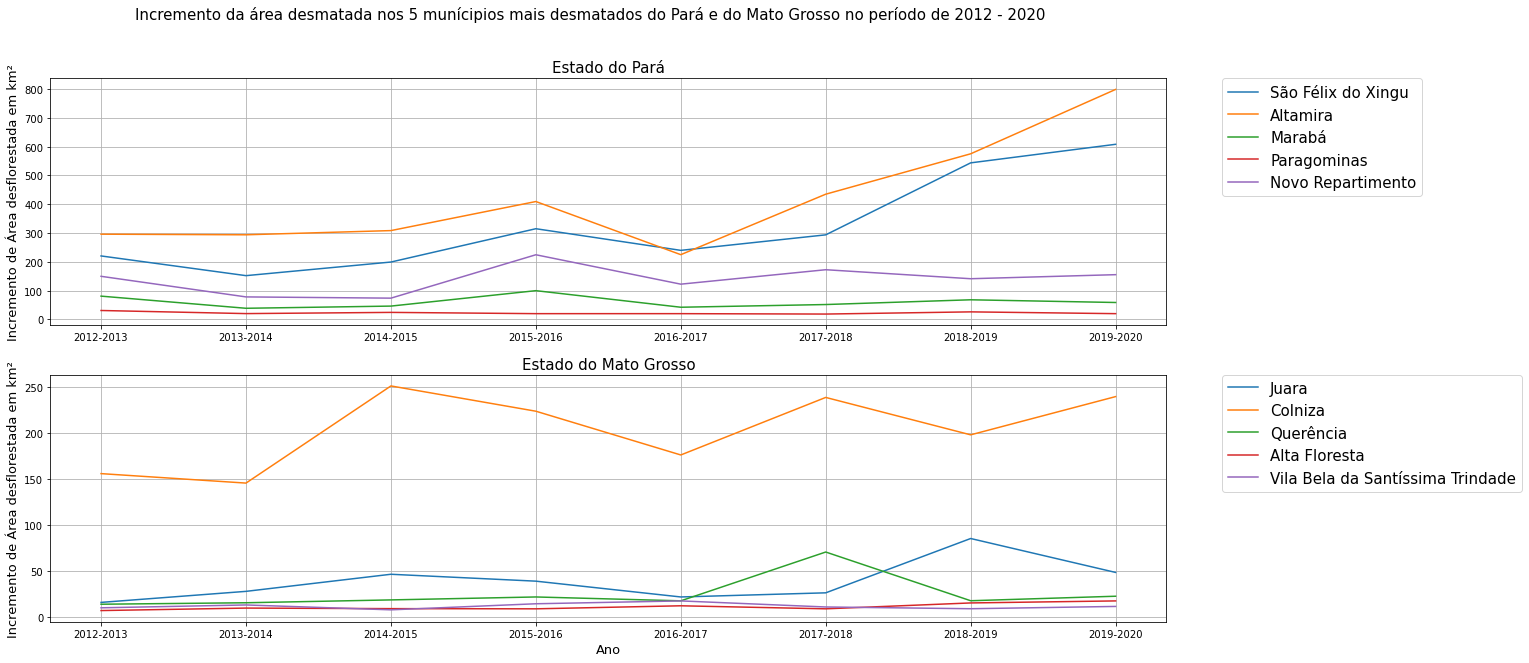

In [13]:
#-----------------------------------------------------------
# Criação do gráfico
#-----------------------------------------------------------

# Eixo x
ano = ('2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020')

# Gráficos
plt.rcParams['figure.figsize'] = [20, 10]

# Utilizar a formatação numérica brasileira
plt.rcParams['axes.formatter.use_locale'] = True


# Início do gráfico
fig5, (pa, mt) = plt.subplots(2)

# Título da figura
fig5.suptitle('Incremento da área desmatada nos 5 munícipios mais desmatados do Pará e do Mato Grosso no período de 2012 - 2020', fontsize=15)

# Plotagem das informações do Estado do Pará
pa.plot(ano, variacao_desmatamento_pa_0, label = cidades_pa[0])
pa.plot(ano, variacao_desmatamento_pa_1, label = cidades_pa[1])
pa.plot(ano, variacao_desmatamento_pa_2, label = cidades_pa[2])
pa.plot(ano, variacao_desmatamento_pa_3, label = cidades_pa[3])
pa.plot(ano, variacao_desmatamento_pa_4, label = cidades_pa[4])

# Informações adicionais: título, labels, legenda, nome dos eixos, grid, formatação
# título
pa.set_title('Estado do Pará', fontsize=15) 
# nome eixo y
pa.set_ylabel('Incremento de Área desflorestada em km²', fontsize=13)
# nome eixo x
# plotar legenda fora do gráfico
pa.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15) 
# formatação numérica do eixo y
pa.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: '{:.16n}'.format(x))) 
# grid
pa.grid(True)

# Plotagem das informações do Estado do Mato Grosso
mt.plot(ano, variacao_desmatamento_mt_0, label = cidades_mt[0])
mt.plot(ano, variacao_desmatamento_mt_1, label = cidades_mt[1])
mt.plot(ano, variacao_desmatamento_mt_2, label = cidades_mt[2])
mt.plot(ano, variacao_desmatamento_mt_3, label = cidades_mt[3])
mt.plot(ano, variacao_desmatamento_mt_4, label = cidades_mt[4])

# Informações adicionais: título, labels, legenda, nome dos eixos, grid, formatação
# título
mt.set_title('Estado do Mato Grosso', fontsize=15) 
# nome eixo y
mt.set_ylabel('Incremento de Área desflorestada em km²', fontsize=13)
# nome eixo x
mt.set_xlabel('Ano', fontsize=13)
# plotar legenda fora do gráfico
mt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15) 
# formatação numérica do eixo y
mt.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: '{:.16n}'.format(x))) 
# grid
mt.grid(True)

# Salvar a imagem
fig5.savefig('Imagens/grafico5.png', dpi=200, bbox_inches='tight')